Problem:
Delve into online retail secctor analyzing a transactional dataset from UK based retailer

dataset Documents all transaction between 2010 and 2011.

Primary Objective ---- amplify the efficency of marketing strategies and boost sales through customer segmentation.

Aim ------- Transform transactional dataset into Customer-Centric dataset by creating new features that will facilitate the segmetation of customer into distinct groups using the K-Means Clustering algorithm.

segmentation allow us tounderstand distinct Profiles and preferences of different customer groups.

Develop recommendation system ------- that suggest top-selling Products to customer within each segement who haven't Purchased those items.

In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score



In [75]:
df = pd.read_csv("data.csv",encoding="ISO-8859-1")
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


Variable	Description

InvoiceNo	Code representing each unique transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode	Code uniquely assigned to each distinct product.

Description	Description of each product.

Quantity	The number of units of a product in a transaction.

InvoiceDate	The date and time of the transaction.

UnitPrice	The unit price of the product in sterling.

CustomerID	Identifier uniquely assigned to each customer.
Country	The country of the customer.

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [77]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [78]:
df.describe(include="object").T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Quantity:

the average quantity of produccts in a transaction is 9.55 

the quantity are wide range, with min of -80995 and a max of 80995. the negative value indicates returned or cancelled orders, which need to be handle appropriately 

the std is quite large, indicating a significant spread in data. the presence of outliers is indicated by a large differencce between in max and 75th percentile values.

UnitPrice 

Avg unit price of the product is 4,6 rupees 

this unit price also shows the wide range from min of -11062.06 to 38970, which suggest the presence of error or noise in th data, because the negative value doesn't make sense.

high std implies the presence of outliers, the large difference btw 75th percentile and max.

Customer ID:

there are 406829 non null values. 

the customer id ranges from 12346 to 18287, helping in identify unique customers 

Invoice No:

it has 25900 unique number, indicating that many transaction are done 

the invoice number 573585 are apperaing 1114 times, Possibly indicating representing a largee transaction or an order with multiple items 

StockCode 

there are 541909 products in which 4070 are unique products and stockcode 85123A are top product with 2313 freq.

Description 

there are 540455 description, which represents missing values in the dataset 

it has 4223 unique description,WHITE HANGING HEART T-LIGHT HOLDER as top description with 2369 freq

InvoiceDate 

there are 541909 dates represents no missing values.

23260 unique date represents numbers days transaction taken place.

10/31/2011 14:41 has most transaction happended

Country 

there are 541909 data repersents no missing value and 38 unique country uk being the majority of the transaction originated.




Text(0.5, 0, 'Percentage %')

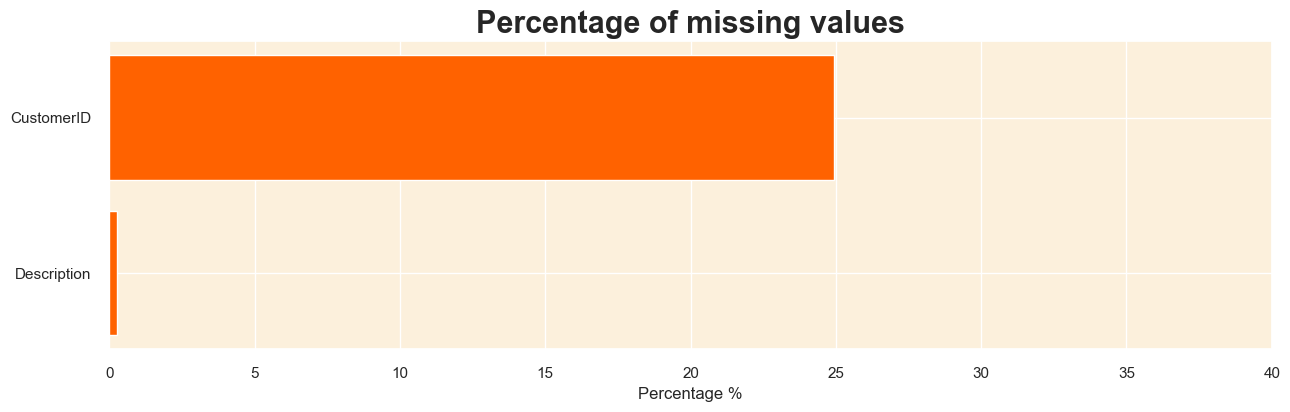

In [79]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0])*100

missing_percentage.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(15,4))

ax.barh(missing_percentage.index, missing_percentage)
# for i in range(len(missing_percentage)):
#     value = missing_percentage[i]
#     name = missing_percentage.index[i]

ax.set_xlim([0,40]) #setting the limits

plt.title("Percentage of missing values", fontweight = "bold", fontsize=22)
plt.xlabel("Percentage %")



Handling the missing values Strategy 

Customer Id ::::::

the customer id column contains nearly a quater missing data. this column is essential for clustering customes and creating recommendation system, imputing such a large percentage of missing values might introduce significant bias or noise into the analysis 

since the clustering is based on customer behaviour and preferences, its curcial to have accurate data on customer identifiers, Therefore, removing the rows with missing Customer Id seems to be ost resonable approach to maintain intergity of the cluster and the analysis 

Description 

this column has minor percentage missing value. however it has been noticed that the inconsitencies in the data where the same stockcode does not always have the same description. this indicates data quality issued potential errors in the product descriptions 

Given this inconsistencies imputing the missing description based on stockcode might not be reliable moreover since the missing percentage is quite low it would be prudent to remove the rowd with missing description to avoid propagating errord and inconsitencies into the subsequent analyses 




In [80]:
df[df["CustomerID"].isnull() | df["Description"].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [81]:
df1 = df.dropna(subset=["Description", "CustomerID"])

In [82]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [83]:
duplicate_rows = df[df.duplicated(keep=False)]

duplicate_rows_sorted = duplicate_rows.sort_values(by=["InvoiceNo", "StockCode", "Description", "CustomerID", "Quantity"])

duplicate_rows_sorted.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


Handling Duplicate strategy 

presence of completely identical rows including identical transaction times suggest that these might be data recording errors rather than genuine repetated transaction, keeping those duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

Therefore, we are going to remove these completely identical duplicate rows from the dataset. 

Removing this data will help in achieving a cleaner dataset, which in trun would aid in building more accurate customer cluster based on their uniqye purchasing behaviours. Moreover it would help in creating a more precise recommendation system by correctly identifying the products with most purcahse.



In [84]:
df1.duplicated().sum()

5225

In [85]:
df1.drop_duplicates(inplace=True)

C:\Users\vishw\AppData\Local\Temp\ipykernel_15952\4156330626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace=True)


In [86]:
df1.shape

(401604, 8)

Treating Cancelled Transaction 

we create new column called Transaction_satus, where InvoiceNo starts with C assign with cancelled transaction otherwise call completed transaction. 
Subsequently we will analyz these rows to understand their common characteristics or patterns



In [87]:
df1["Transaction_Status"] = np.where(df1["InvoiceNo"]. astype(str).str.startswith("C"), "Cancelled", "Completed")
df1["Transaction_Status"].head(5)
cancelled_transaction = df1[df1["Transaction_Status"] == "Cancelled"]

cancelled_transaction.describe().drop("CustomerID", axis=1)


C:\Users\vishw\AppData\Local\Temp\ipykernel_15952\839449464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Transaction_Status"] = np.where(df1["InvoiceNo"]. astype(str).str.startswith("C"), "Cancelled", "Completed")


,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000



All quantities in the cancelled transaction are negative indicating that these order that were cancelled 

the unit price has wide range, showing that a variety products from high to low were part of the cancelled products 



In [88]:
df1.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed


strategy for handling cancelled transaction 

by project objective customer cluster based on their purchasing behaviour and preferences and to eventually create recommendation system. its essential to study customer cancellation pattern. Therefore the strategy is to retain these cancellation tranasction in the dataset, marking them distinctly to facilate further analysis

improve the clustering process by incorporating patterns and trends observed in cancellation data, which miight represents certain customer behaviour or preferences 

Allow the recommendation system to possibly prevent suggesting products that have highly likelihood of being cancelled, thereby improving the quality of recommendation .

In [89]:
cancelled_percentage = (cancelled_transaction.shape[0] / df1.shape[0] )*100

cancelled_percentage

2.209141343213713

In [90]:
unique_stock_codes = df1["StockCode"].unique()


unique_stock_codes

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

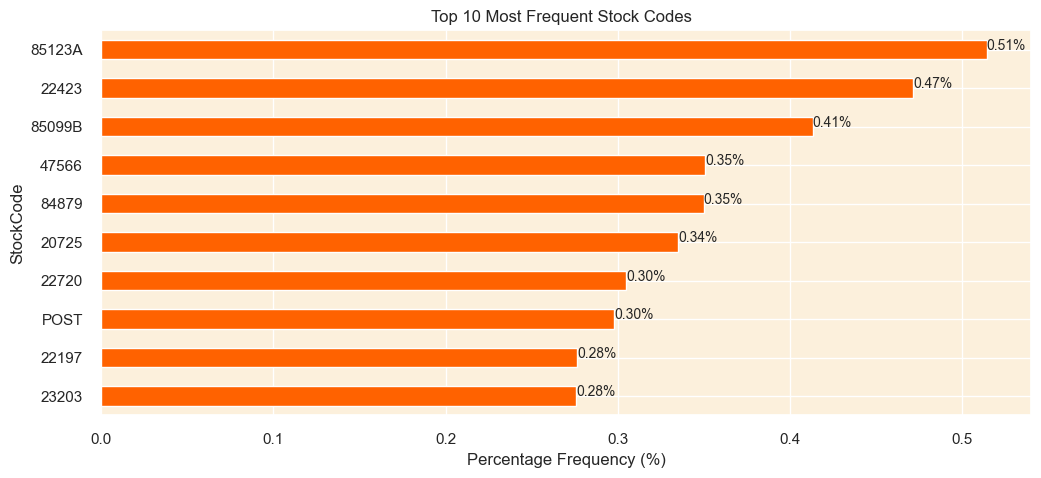

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64

In [91]:
top_10_stock_codes = df1["StockCode"].value_counts(normalize=True).head(10)*100

plt.figure(figsize=(12,5))
top_10_stock_codes.plot(kind="barh")

index = 0

for i in range(len(top_10_stock_codes)):
    index = i
    value = top_10_stock_codes[i]
    plt.text(value, index, f'{value:.2f}%', fontsize=10 )

plt.title("Top 10 Most Frequent Stock Codes  ")
plt.xlabel("Percentage Frequency (%)")
plt.ylabel("StockCode")
plt.gca().invert_yaxis()
plt.show()
top_10_stock_codes


inference on stockcode 

Product variety: 
the dataset contains 3684 unique stockcodes indicating a substantial variety of products available in the online retail store. the diversity can potential lead to the identification of distinct customer clusters, with preference for different types of product 

Popular items:

A closer look at the top 10 most frequent stock code can offers insights into the popular products or categories that are frequently purchased by customer 

Stock Code Anomalies 

Here we obsereve that while most stock codes are composed of 5 to 6 characters there are some anamolies like the code "POST". These anamolies might represents services or non-product transaction (perhaps postage fees) rather than actual products. To maintain the focus of the project which is clustering based on product purchase and creating a recommendatio nsystem these anamolies should be further investigated and possibly related appropriately to ansure data intergity. 

to understand deper into identifying these anamolies. we explore the frequenct of the umber of numeric characters in the stock code, which can provide insights into the nature of these unusual entries.

In [92]:
df1[df1["StockCode"] == "POST"].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,France,Completed
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Netherlands,Completed
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662.0,Germany,Completed
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738.0,Germany,Completed
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686.0,France,Completed


In [93]:
unique_stock_codes

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [94]:
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x:sum(c.isdigit() for c in str(x))).value_counts()

print("Value counts of numeric character frequencies in unique stock code")
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock code
5    3676
0       7
1       1
Name: count, dtype: int64


inference from output 

majority of unique stock code contain exactly 5 numeric characters which seems to br standard format for representing product code in dataset 

there are few anamolies 7 stock codes contains no numeric characters and 1 stock code contains only one numeric character, these are clearly deviating from the standard format and need further understanding to understanf their nature and whether they represents valid product transacction 

now we identify the stock code contains 0 or 1 numeric characters to further understand these anamolies 





In [95]:
anamalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0,1)]

print("Anamalous Stock Code")
for code in anamalous_stock_codes:
    print(code)

Anamalous Stock Code
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [96]:
# CALCULATING PERCENTAGE OF THESE ANAMOLIES 

percentage_anomalous = (df1["StockCode"].isin(anamalous_stock_codes).sum()/len(df1))*100

print("percentage of anomalous stockcode ")
print(percentage_anomalous)

percentage of anomalous stockcode 
0.4768378801007958


form the percentage of anomalous stockcode 0.48% we observe these code small in number 

these code seems to represent non-product transaction like bank charges , post etc since these are not actuall products and very small in proportion of dataset, this might introduce the noise in clustering and recomendation system

since the context of the project which aims to customer cluster based on product we remove the anomalous stockcode which are not a genuine product.

we remove these anomalous stockcode from the dataset 


In [97]:
df1 = df1[~df1["StockCode"].isin(anamalous_stock_codes)]
df1.shape

(399689, 9)

Cleaning Description column 

count unique description 

plot top 10 


In [98]:
descrption_counts = df1["Description"].value_counts()
descrption_counts

Description
WHITE HANGING HEART T-LIGHT HOLDER    2058
REGENCY CAKESTAND 3 TIER              1894
JUMBO BAG RED RETROSPOT               1659
PARTY BUNTING                         1409
ASSORTED COLOUR BIRD ORNAMENT         1405
                                      ... 
FRYING PAN RED POLKADOT                  1
PEG BAG APPLE DESIGN                     1
PINK POLKADOT KIDS BAG                   1
BLACK DIAMOND CLUSTER NECKLACE           1
SET 12 COLOURING PENCILS DOILEY          1
Name: count, Length: 3888, dtype: int64

In [99]:
a = df1["StockCode"].nunique()
a

3676

In [100]:
b = df1["Description"].nunique()
b

3888

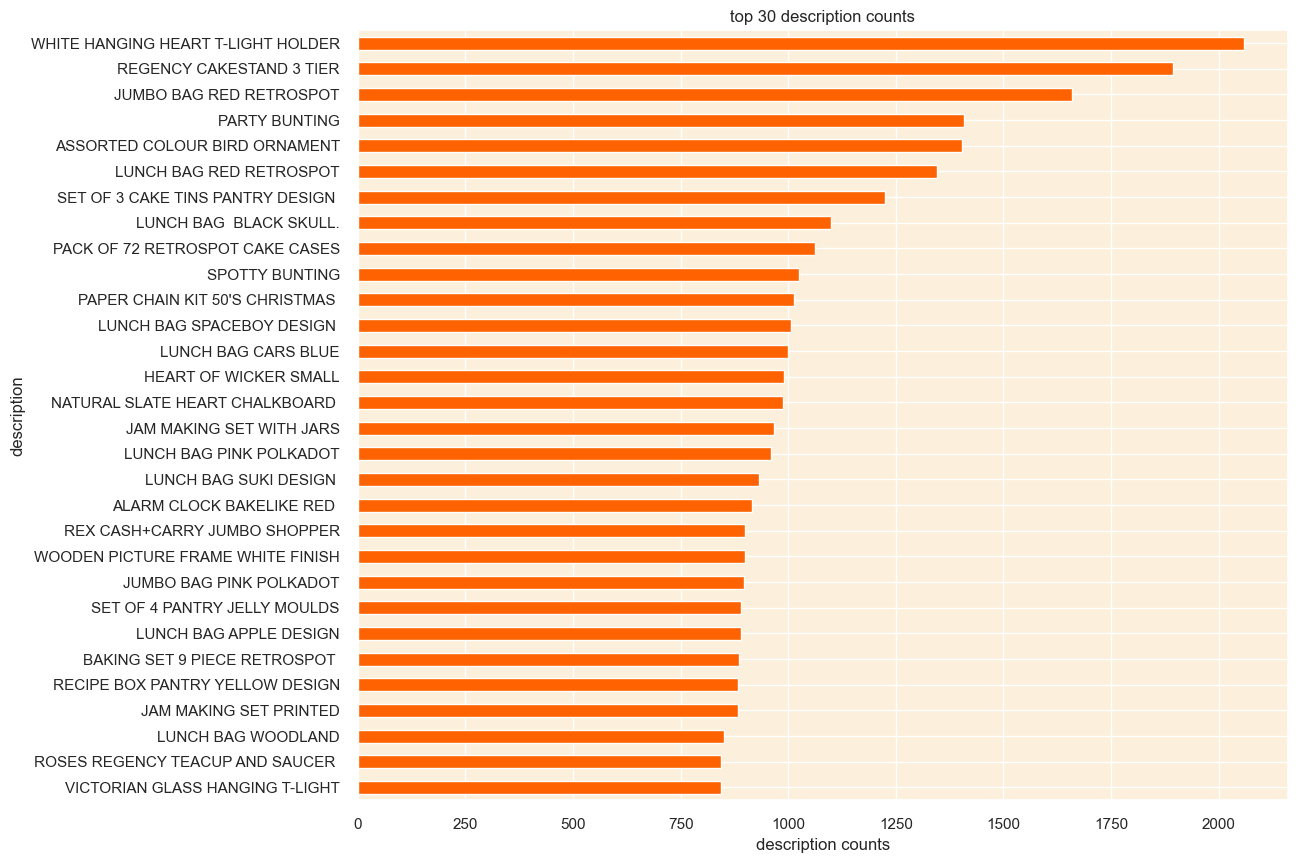

In [101]:
top_30_description = descrption_counts[:30]

plt.figure(figsize=(12,10))
top_30_description.plot(kind='barh')

plt.title("top 30 description counts")
plt.xlabel("description counts")
plt.ylabel("description")

plt.gca().invert_yaxis()
plt.show()

Here all descriptions are in uppercase, which might be the standard format . however consider the inconsitencies and anomalies we check for any lowercase description, or any mix style description.

In [102]:
lowecase_description = df1["Description"].unique()
lowecase_description = [desc for desc in lowecase_description if any(char.islower() for char in desc)]

print("the description which contains the lowercase letter")
print("-"*50)
for i in lowecase_description:
    print(i)

the description which contains the lowercase letter
--------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


from above list "Next Day Carriage" and "High Resolution Image" are not product it may service details. 

strategy 

---------------> remove the service related description form the dataset 

---------------> for maintaing the uniformity we change the remaining lowercase description to uppercase

In [103]:
service_related_description = ["Next Day Carriage", "High Resolution Image"]

service_related_percentage = (len(df1[df1["Description"].isin(service_related_description)])/ len(df1["Description"]))*100

print("the percentage of service related description in dataset is")
print("-"*60)
print(service_related_percentage)

the percentage of service related description in dataset is
------------------------------------------------------------
0.02076614567826485


In [104]:
df1 = df1[~df1["Description"].isin(service_related_description)]

df["Description"] = df1["Description"].str.upper()


In [105]:
df1["UnitPrice"].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [106]:
df1[df1["UnitPrice"] == 0].describe()[["Quantity"]]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


inferences 

the transaction with unit price of zero are 33 in number 

the quantity range from 1 to 12540 there are substantial standard deviation.

these transaction may introduce the noise in project so we remove it 

In [107]:
df1 = df1[df1["UnitPrice"] > 0]
df1.shape[0]

399573

OUTLIER TREATMENT

In k-Means clustering, the algorithm sensitive to both the scale of the data the presence of outliers, as they can significantly influence the position of centroids potentially leading to incorrect cluster assignments. However considering the context of this project where the final goal project to understand customer behaviour and preferences through K-Means, it would be more wise to address the issue of outliers after the features engineering phase where we create a customer centric dataset. so we don't remove the outliers. 


In [108]:
df1.reset_index(drop=True, inplace=True)
df1.shape[0]

399573

FEATURES ENGINEERING

To create customer centric dataset for clustering and recommendation 

RFM FEATURES 

RFM is a method where used for analyzing customer value and segmenting the customer base. 

RECENCY (R): The metric how recntly the customr has made a purchase. A lower recency value means cutomer made purchase recently, indicating higher enagement with the brand 

FREQURNCY(F): This metric signifies how often a customer makes a pruchase within a certain period. higher frequency value indicates customer who interacts with the business more often, this suggest higher loyalty or satisfication 

MONETARY(M): This metric represents the total amount of money a customer has spent over a certain period. Customer who have higher value have contributed to business indicating their potential high life time.

these metrics help in understanding customer buying behavour and preferences which play important role in this project. 


In [109]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Transaction_Status'],
      dtype='object')

RECENCY(R)

Here we understand the customer recent purchase. it helps us to indentify the engagement level of customer. 

DAYS SINCE LAST PURCHASE: 

this feature represents the number of days that have passed since the customer last purchase. by understanding the recency of purchase, business can tailor their marketing strategies to re-engage customer who have not made a purchase in a while, potentially increasing customer retention and fostering loyallty.



In [110]:
df1["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

df1["InvoiceDay"] = df1["InvoiceDate"].dt.date

customer_data = df1.groupby("CustomerID")["InvoiceDay"].max().reset_index()

most_recent_date = df1["InvoiceDate"].max()

customer_data["InvoiceDay"] = pd.to_datetime(customer_data["InvoiceDay"])

most_recent_date = pd.to_datetime(most_recent_date)

customer_data["Days_Since_Last_Purchase"] = (most_recent_date - customer_data["InvoiceDay"]).dt.days

customer_data.drop(columns=["InvoiceDay"], inplace=True)


In [111]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,303
1,12347.0,3
2,12348.0,97
3,12349.0,21
4,12350.0,280


the above customer_data dataframe for customer centric which eventually contain all the customer-based features we plan to create 


FREQUENCY(F):

Here we create two features that quantify the frequency of customer engagement with the retailer. 

TOTAL_TRANSACTION: This features contains total number of transaction made by a ccustomer. it helps in understanding the engagement level of a customer with the retailer.

TOTAL PRODUCTS PURCHASED: This features indicates the total number of products purchased by the customer across all transaction. It gives an insight into the customer's buying behaviour in terms of the volume of products purchased 

In [112]:
total_transactions = df1.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

total_transactions.rename(columns={"InvoiceNo": "Total_Transactions"}, inplace=True)

total_products_purchased = df1.groupby("CustomerID")["Quantity"].sum().reset_index()

total_products_purchased.rename(columns={"Quantity" : "Total_Products_Purchased"}, inplace=True)


customer_data = pd.merge(customer_data, total_transactions, on="CustomerID")
customer_data = pd.merge(customer_data, total_products_purchased, on="CustomerID")

print(customer_data.shape)
customer_data.head()


(4362, 4)


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,303,2,0
1,12347.0,3,7,2458
2,12348.0,97,4,2332
3,12349.0,21,1,630
4,12350.0,280,1,196


MONETARY(M): 

Here we add two features 

TOTAL SPEND: 

The features represents the total amount of money spent by each customer.It is calculated as the sum of the products of unitprice and quantity for all transaction made by a customer. This feature helps to identify revenue generated by each customer, which indicator of customer's value to the business.

AVERAGE TRANSACTION VALUE: 

This feature is calculated by (Total spend/Total Transaction) for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavoiur of customer per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [113]:
df1["Total_Spend"] = df1["UnitPrice"]*df1["Quantity"]
total_spend = df1.groupby("CustomerID")["Total_Spend"].sum().reset_index()


# here we adding totalspend column twice in customer data which gives _x and _y columns 

customer_data = pd.merge(customer_data, total_spend, on="CustomerID")


average_transaction_value = total_spend.merge(total_transactions, on="CustomerID")


average_transaction_value["Average_Transaction_value"] = average_transaction_value["Total_Spend"] / average_transaction_value["Total_Transactions"]

# below line already addded in the customer data 

customer_data = pd.merge(customer_data, average_transaction_value[["CustomerID", "Average_Transaction_value"]], on="CustomerID")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value
0,12346.0,303,2,0,0.00,0.000000
1,12347.0,3,7,2458,4310.00,615.714286
2,12348.0,97,4,2332,1437.24,359.310000
3,12349.0,21,1,630,1457.55,1457.550000
4,12350.0,280,1,196,294.40,294.400000


In [114]:
# # Dropping the redundant columns
# customer_data_cleaned = customer_data.drop(columns=[
#     'Total_Transactions_x', 'Total_Products_Purchased_x', 
#     'Total_Spend_x', 'Average_Transaction_value_x', 
#     'Total_Transactions_y', 'Total_Products_Purchased_y', 
#     'Total_Spend_y', 'Average_Transaction_value_y'
# ])

# # Display the cleaned data
# customer_data_cleaned.head()


PRODUCT DIVERSITY 

Here we understand diversity in product purchase behaviour of customer. understanding this helps us to crafting personalized marketing strategied and product recommendation

UNIQUE PRODUCTS PURCHASED :

This features represents the number of distinct products bought by customer. A higher value indicates that the customer has a diverse taste or preference buying a wide range of products, while a lower value might indicates the focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which is important input in recommendation system. 

In [115]:
unique_products_purchased = df1.groupby("CustomerID")["StockCode"].nunique().reset_index()
unique_products_purchased.rename(columns={"StockCode": "Unique_Products_Purchased"}, inplace=True)

customer_data = pd.merge(customer_data, unique_products_purchased, on="CustomerID")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased
0,12346.0,303,2,0,0.00,0.000000,1
1,12347.0,3,7,2458,4310.00,615.714286,103
2,12348.0,97,4,2332,1437.24,359.310000,21
3,12349.0,21,1,630,1457.55,1457.550000,72
4,12350.0,280,1,196,294.40,294.400000,16


BEHAVIOURAL FEATURES 

Here we try to understand and find the pattern and behaviours of customer. 
These features gives us insight into the customer preferences regarding when they are like to shop, which is important information for personalizing their shoppinf experience. 

AVERAGE DAYS BETWEEN PURCHASE: average number of days a customer waits before making another purchase. understanding this helps us to predict when the customer is likely to make their nextt purcahse. used for targeted marketing and personalized promotions. 

FAVORITE SHOPPING DAY: This denotes the day of the week when the customer shops the most. this helps in identifying the prefered shoping days of different customer segments, used to optimize marketing strategies and promotions for different days of the week. 

FAVORITE SHOPPING HOURS: Hour of the day when the customer shop the most. This helps in marketing and promotions to align with the times when different customer segments are more active 




In [116]:
df1["Day_Of_Week"] = df1["InvoiceDate"].dt.dayofweek
df1["Hour"] = df1["InvoiceDate"].dt.hour


# Average days between consecutive purchase 
days_between_purchase = df1.groupby("CustomerID")["InvoiceDay"].apply(lambda x: (x.diff().dropna()).apply(lambda y : y.days))

average_days_between_purchase = days_between_purchase.groupby("CustomerID").mean().reset_index()

average_days_between_purchase.rename(columns={"InvoiceDay": "Average_Days_Between_Purchase"}, inplace=True)




In [117]:
days_between_purchase

CustomerID        
12346.0     37339      0
12347.0     10363      0
            10364      0
            10365      0
            10366      0
                      ..
18287.0     286817     0
            286818     0
            312503    22
            312504     0
            312505     0
Name: InvoiceDay, Length: 395211, dtype: int64

In [118]:
# Find the favorite shopping day of the week 

favorite_shopping_day = df1.groupby(["CustomerID", "Day_Of_Week"]).size().reset_index(name="Count")
favorite_shopping_day

,CustomerID,Day_Of_Week,Count
0,12346.0,4,2
1,12347.0,0,31
2,12347.0,1,69
3,12347.0,2,71
4,12347.0,3,11
...,...,...,...
11198,18283.0,3,189
11199,18283.0,4,29
11200,18283.0,6,24
11201,18287.0,1,67


In [119]:


favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby("CustomerID")["Count"].idxmax()][["CustomerID", "Day_Of_Week"]]
favorite_shopping_day

,CustomerID,Day_Of_Week
0,12346.0,4
3,12347.0,2
8,12348.0,4
9,12349.0,6
10,12350.0,6
...,...,...
11191,18280.0,2
11192,18281.0,3
11194,18282.0,4
11196,18283.0,1


In [120]:
# Find the favourite shopping hour of the day. 

favorite_shopping_hour = df1.groupby(["CustomerID", "Hour"]).size().reset_index(name="Count")
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby("CustomerID")["Count"].idxmax()][["CustomerID", "Hour"]]

favorite_shopping_hour

,CustomerID,Hour
0,12346.0,17
2,12347.0,10
6,12348.0,9
10,12349.0,16
11,12350.0,14
...,...,...
14170,18280.0,16
14171,18281.0,15
14172,18282.0,13
14179,18283.0,15


In [121]:
# Merge the new features into the customer_data dataframe 

customer_data = pd.merge(customer_data, average_days_between_purchase, on="CustomerID")
customer_data = pd.merge(customer_data, favorite_shopping_day, on="CustomerID")
customer_data = pd.merge(customer_data, favorite_shopping_hour, on="CustomerID")
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour
0,12346.0,303,2,0,0.00,0.000000,1,0.000000,4,17
1,12347.0,3,7,2458,4310.00,615.714286,103,1.718232,2,10
2,12348.0,97,4,2332,1437.24,359.310000,21,8.192308,4,9
3,12349.0,21,1,630,1457.55,1457.550000,72,0.000000,6,16
4,12350.0,280,1,196,294.40,294.400000,16,0.000000,6,14


GEOGRAPHICAL FEATURES 

COUNTRY: This features helps us to understand region-specific buying patterns and preferences. This is critical for personalizing marketing strategies and inventory planing. it can be instrument in logistic and supply chain management, particularly for  supply chain optimization, like shipping and delivery

In [122]:
df1["Country"].value_counts(normalize=True).head()*100

Country
United Kingdom    89.097111
Germany            2.272176
France             2.040178
EIRE               1.843968
Spain              0.616158
Name: proportion, dtype: float64

INFERENCES 

Given that a major protion of transaction originating from the United Kingdom, we might consider creating a binary features indicating whether the transaction is from UK or not. This approach can potentially streamline the clustering process without losing critical geographical info. this also due to algorithm we considering K-Means which is sensitive to the dimensionality of the features space 

METHODOLOGY 

group the data by customer and country and calculate the number of transaction per country for each customer 

Next we identify the main country for each customer(the country which have the max trasaction)

Then we create the binary column indicating whether the customer id from the UK or not.

Finally, we will this information with the customer_data dataframe to include the new features in our analysis. 




In [123]:
customer_country = df1.groupby(["CustomerID", "Country"]).size().reset_index(name="Number_of_Transaction")

# Get the country with maximum numebr of transaction for each customer
customer_main_country = customer_country.sort_values("Number_of_Transaction", ascending=True).drop_duplicates("CustomerID")

# Create the binary columns indicating whether the customer is from UK or not 
customer_main_country["Is_UK"] = customer_main_country["Country"].apply(lambda x: 1 if x == "United Kingdom" else 0)

customer_data = pd.merge(customer_data, customer_main_country[["CustomerID", "Is_UK"]], on="CustomerID", how="left")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK
0,12346.0,303,2,0,0.00,0.000000,1,0.000000,4,17,1
1,12347.0,3,7,2458,4310.00,615.714286,103,1.718232,2,10,0
2,12348.0,97,4,2332,1437.24,359.310000,21,8.192308,4,9,0
3,12349.0,21,1,630,1457.55,1457.550000,72,0.000000,6,16,0
4,12350.0,280,1,196,294.40,294.400000,16,0.000000,6,14,0


In [124]:
customer_main_country.head()

,CustomerID,Country,Number_of_Transaction,Is_UK
2939,16323.0,United Kingdom,1,1
3243,16737.0,United Kingdom,1,1
583,13099.0,United Kingdom,1,1
4239,18113.0,United Kingdom,1,1
598,13120.0,United Kingdom,1,1


In [125]:
customer_data["Is_UK"].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

CANCELLATION INSIGHTS 

Here we try to understand the cancellation pattern of customer to gain insights which helps us to enhance the customer segmentation model. 


CANCELLATION FREQUENCY: total numeber of transaction cancelled by a customer. by understandin this we know the customer who are morelikely to cancell the transaction. this could be a indicator or other issues and understanding this helps us to tailor the strategies to reduce cancellation and enhance customer satisfaction. 


CANCELLATION RATE: This represents the proportion of transaction cancelled out of all transaction done by customer. A hight cancellation rate might indicates the unsatisfied customer segment. by identifing this segment we develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate


In [126]:
# calculate the total number of transaction made by each customer 
total_transactions = df1.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()

cancelled_transaction = df1[df1["Transaction_Status"] == "Cancelled"]

cancelled_frequency = cancelled_transaction.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
cancelled_frequency.rename(columns={"InvoiceNo": "Cancellation_Frequency"}, inplace=True)

# cancelled_frequency.head()

customer_data = pd.merge(customer_data, cancelled_frequency,on="CustomerID", how="left")

customer_data["Cancellation_Frequency"].fillna(0, inplace=True)

customer_data["Cancellation_rate"] = customer_data["Cancellation_Frequency"] / total_transactions["InvoiceNo"]

customer_data.head()



,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate
0,12346.0,303,2,0,0.00,0.000000,1,0.000000,4,17,1,1.0,0.5
1,12347.0,3,7,2458,4310.00,615.714286,103,1.718232,2,10,0,0.0,0.0
2,12348.0,97,4,2332,1437.24,359.310000,21,8.192308,4,9,0,0.0,0.0
3,12349.0,21,1,630,1457.55,1457.550000,72,0.000000,6,16,0,0.0,0.0
4,12350.0,280,1,196,294.40,294.400000,16,0.000000,6,14,0,0.0,0.0


In [127]:
customer_data.shape

(4282, 13)

SEASONALITY AND TRENDS 

Here we understand the seasonality and trends of customer purchasing behaviour

MONTHLY_SPENDING_MEAN: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean indicates a more budget-conscious customer.

MONTHLY_SPENDIGN_STD:This feature indicates the variability in a customers monthly spending. A higher value signals that the customer spending fluctuates significantly month to month, perhaps indicating sporadic largest purchases. In contrast, a lower value suggest more stable, consistent spending habits, Understanding this variability can help in crafting personalized promotions or discounts during periods they are are expected to spend more. 

SPENDING_TREND: This reflects the trends in a customer's spending over time, calculated as the slope of the linear trend line lifted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfication. A non-zero values signifies stable spending habits, a negativee trend indicates the decreasing interest or satisfication, highlighting a need for re-engagement strategies. understanding this trends can help in develop strategies to maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns. 

In [128]:
df1["Year"] = df1["InvoiceDate"].dt.year
df1["Month"] = df1["InvoiceDate"].dt.month

# calculate monthly spending of each customer 

monthly_spending = df1.groupby(["CustomerID", "Year", "Month"])["Total_Spend"].sum().reset_index()
# monthly_spending.head()

seasonal_buying_patterns = monthly_spending.groupby("CustomerID")["Total_Spend"].agg(["mean", "std"]).reset_index()
seasonal_buying_patterns.rename(columns={"mean": "Monthly_Spending_Mean", "std":"Monthly_Spending_Std"}, inplace=True)

seasonal_buying_patterns["Monthly_Spending_Std"].fillna(0, inplace=True)

def calculate_trend(spend_data):
    if len(spend_data) > 1 :
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x,spend_data)
        return slope 
    else: 
        return 0 
    
spending_trends = monthly_spending.groupby("CustomerID")["Total_Spend"].apply(calculate_trend).reset_index()
spending_trends.rename(columns={"Total_Spend": "Spending_Trend"}, inplace= True)

customer_data = pd.merge(customer_data, seasonal_buying_patterns, on="CustomerID")
customer_data = pd.merge(customer_data, spending_trends, on="CustomerID")

customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,303,2,0,0.00,0.000000,1,0.000000,4,17,1,1.0,0.5,0.000000,0.000000,0.000000
1,12347.0,3,7,2458,4310.00,615.714286,103,1.718232,2,10,0,0.0,0.0,615.714286,341.070789,4.486071
2,12348.0,97,4,2332,1437.24,359.310000,21,8.192308,4,9,0,0.0,0.0,479.080000,314.069513,-285.120000
3,12349.0,21,1,630,1457.55,1457.550000,72,0.000000,6,16,0,0.0,0.0,1457.550000,0.000000,0.000000
4,12350.0,280,1,196,294.40,294.400000,16,0.000000,6,14,0,0.0,0.0,294.400000,0.000000,0.000000


In [129]:
customer_data["CustomerID"] = customer_data["CustomerID"].astype(str)


# the below code to change customer_data data types of columns to optimal types 
customer_data = customer_data.convert_dtypes()
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,303,2,0,0.0,0.0,1,0.0,4,17,1,1,0.5,0.0,0.0,0.0
1,12347.0,3,7,2458,4310.0,615.714286,103,1.718232,2,10,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,97,4,2332,1437.24,359.31,21,8.192308,4,9,0,0,0.0,479.08,314.069513,-285.12
3,12349.0,21,1,630,1457.55,1457.55,72,0.0,6,16,0,0,0.0,1457.55,0.0,0.0
4,12350.0,280,1,196,294.4,294.4,16,0.0,6,14,0,0,0.0,294.4,0.0,0.0


In [130]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     4282 non-null   string 
 1   Days_Since_Last_Purchase       4282 non-null   Int64  
 2   Total_Transactions             4282 non-null   Int64  
 3   Total_Products_Purchased       4282 non-null   Int64  
 4   Total_Spend                    4282 non-null   Float64
 5   Average_Transaction_value      4282 non-null   Float64
 6   Unique_Products_Purchased      4282 non-null   Int64  
 7   Average_Days_Between_Purchase  4282 non-null   Float64
 8   Day_Of_Week                    4282 non-null   Int32  
 9   Hour                           4282 non-null   Int32  
 10  Is_UK                          4282 non-null   Int64  
 11  Cancellation_Frequency         4282 non-null   Int64  
 12  Cancellation_rate              4282 non-null   F

Customer Dataset Description:

Variable	Description

CustomerID	Identifier uniquely assigned to each customer, used to distinguish individual customers.

Days_Since_Last_Purchase	The number of days that have passed since the customer's last purchase.

Total_Transactions	The total number of transactions made by the customer.
Total_Products_Purchased	The total quantity of products purchased by the customer across all transactions.

Total_Spend	The total amount of money the customer has spent across all transactions.

Average_Transaction_Value	The average value of the customer's transactions, calculated as total spend divided by the number of transactions.

Unique_Products_Purchased	The number of different products the customer has purchased.

Average_Days_Between_Purchases	The average number of days between consecutive purchases made by the customer.

Day_Of_Week	The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday).

Hour	The hour of the day when the customer prefers to shop, represented in a 24-hour format.

Is_UK	A binary variable indicating whether the customer is based in the UK (1) or not (0).

Cancellation_Frequency	The total number of transactions that the customer has cancelled.

Cancellation_Rate	The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions.

Monthly_Spending_Mean	The average monthly spending of the customer.

Monthly_Spending_Std	The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern.

Spending_Trend	A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend.

OUTLEIRS DETECTION AND TREATEMENT 

since nature of dataset in multi dimensional, it would be wise to use the algorithm that can detec outliers in multi-dimensional space . we are going to use isolation forest algorithm for this task. This algorithm works as follows, it isolates observation by randomly selcting a features and randomly split value between the maximum and minimum values of selected features. 

In [131]:
# here we instalize the isolationforest model with conatamination parameter of 0.05 (this explains 5% of data is outliers)

model = IsolationForest(contamination=0.05, random_state=0)

customer_data["Outlier_Scores"] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

customer_data["Is_Outlier"] = [1 if x == -1 else 0 for x in customer_data["Outlier_Scores"]]

customer_data.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,303,2,0,0.0,0.0,1,0.0,4,17,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,3,7,2458,4310.0,615.714286,103,1.718232,2,10,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,97,4,2332,1437.24,359.31,21,8.192308,4,9,0,0,0.0,479.08,314.069513,-285.12,1,0
3,12349.0,21,1,630,1457.55,1457.55,72,0.0,6,16,0,0,0.0,1457.55,0.0,0.0,-1,1
4,12350.0,280,1,196,294.4,294.4,16,0.0,6,14,0,0,0.0,294.4,0.0,0.0,1,0


visualize the distribution of these scores and the number of inliers and outliers by the model 

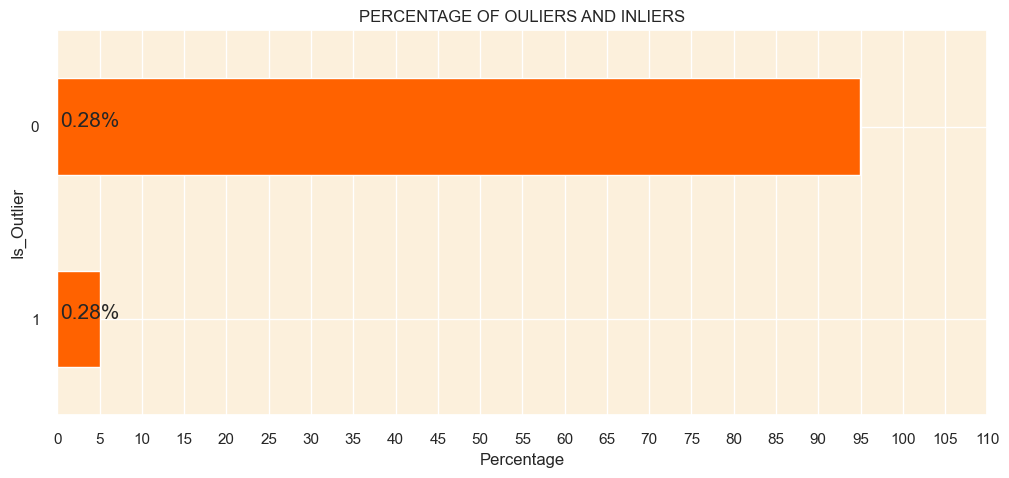

In [132]:
outlier_percentage = customer_data["Is_Outlier"].value_counts(normalize=True)*100

plt.figure(figsize=(12,5))
outlier_percentage.plot(kind="barh")

for index, values in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title("PERCENTAGE OF OULIERS AND INLIERS")
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel("Percentage")
plt.ylabel("Is_Outlier")
plt.gca().invert_yaxis()
plt.show()


5% of customer are consider to be outlier which is resonable, not to high to lose a significant amount of data and to low to retain potentially noisy data points

STRATEGY TO DEAL OUTLIERS

consider the nature of the project, it is crucial to handle these outliers. we separate these outliers for further analysis and remove from main dataset to prepare clustering analysis 

-----> separate the outlier for analysis and save them as separate file 

-----> Remove the main dataset 

-----> Drop outlier_Scores and Is_outlier column from customer_data

In [133]:
outlier_data = customer_data[customer_data["Is_Outlier"] == 1]

customer_data_cleaned = customer_data[customer_data["Is_Outlier"]==0]

customer_data_cleaned = customer_data_cleaned.drop(columns=["Outlier_Scores", "Is_Outlier"])

customer_data_cleaned.reset_index(drop=True, inplace=True)

In [134]:
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,303,2,0,0.0,0.0,1,0.0,4,17,1,1,0.5,0.0,0.0,0.0
1,12347.0,3,7,2458,4310.0,615.714286,103,1.718232,2,10,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,97,4,2332,1437.24,359.31,21,8.192308,4,9,0,0,0.0,479.08,314.069513,-285.12
3,12350.0,280,1,196,294.4,294.4,16,0.0,6,14,0,0,0.0,294.4,0.0,0.0
4,12352.0,44,8,463,1265.41,158.17625,57,2.783133,4,14,0,1,0.125,316.3525,174.355439,-11.519


In [135]:
outlier_data.reset_index(drop=True, inplace=True)
outlier_data

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12349.0,21,1,630,1457.55,1457.55,72,0.0,6,16,0,0,0.0,1457.55,0.0,0.0,-1,1
1,12356.0,25,3,1573,2487.43,829.143333,52,4.877193,4,17,0,0,0.0,829.143333,991.462585,-944.635,-1,1
2,12357.0,39,1,2708,6207.67,6207.67,131,0.0,2,12,0,0,0.0,6207.67,0.0,0.0,-1,1
3,12359.0,9,6,1599,6182.98,1030.496667,214,1.18,2,12,0,2,0.333333,1030.496667,1137.566659,25.072571,-1,1
4,12371.0,77,1,582,1527.96,1527.96,62,0.0,6,15,0,0,0.0,1527.96,0.0,0.0,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,18109.0,3,31,4212,7877.27,254.105484,120,0.7,3,15,1,5,5.0,716.115455,476.650484,38.696727,-1,1
211,18118.0,11,31,2848,5564.63,179.504194,423,0.241706,4,13,1,5,5.0,505.875455,324.810345,-62.574091,-1,1
212,18139.0,19,6,5557,8438.34,1406.39,35,0.006329,1,15,1,0,0.0,8438.34,0.0,0.0,-1,1
213,18225.0,4,17,3204,5356.86,315.109412,151,1.109541,1,15,1,5,5.0,486.987273,332.229201,39.872727,-1,1


CORRELATION ANALYSIS

We need to check the correlation between features in our dataset. the presence of multicollinearity where features are highly related, can potential affect the clustering process by nor allowing the model to learn the actual undelying patterns in the data, as the features do not provide the unique info. this could lead to cluster that are not well separated and meanigful 

if we identify the multicollinearity we can utilize dimensionality reduction like PCA. this neutralize the multicollinearity by transforming corealted features into new set of uncorrelated variables, preserving most of the original data variance. this enhance quality of clusters and computational effect 

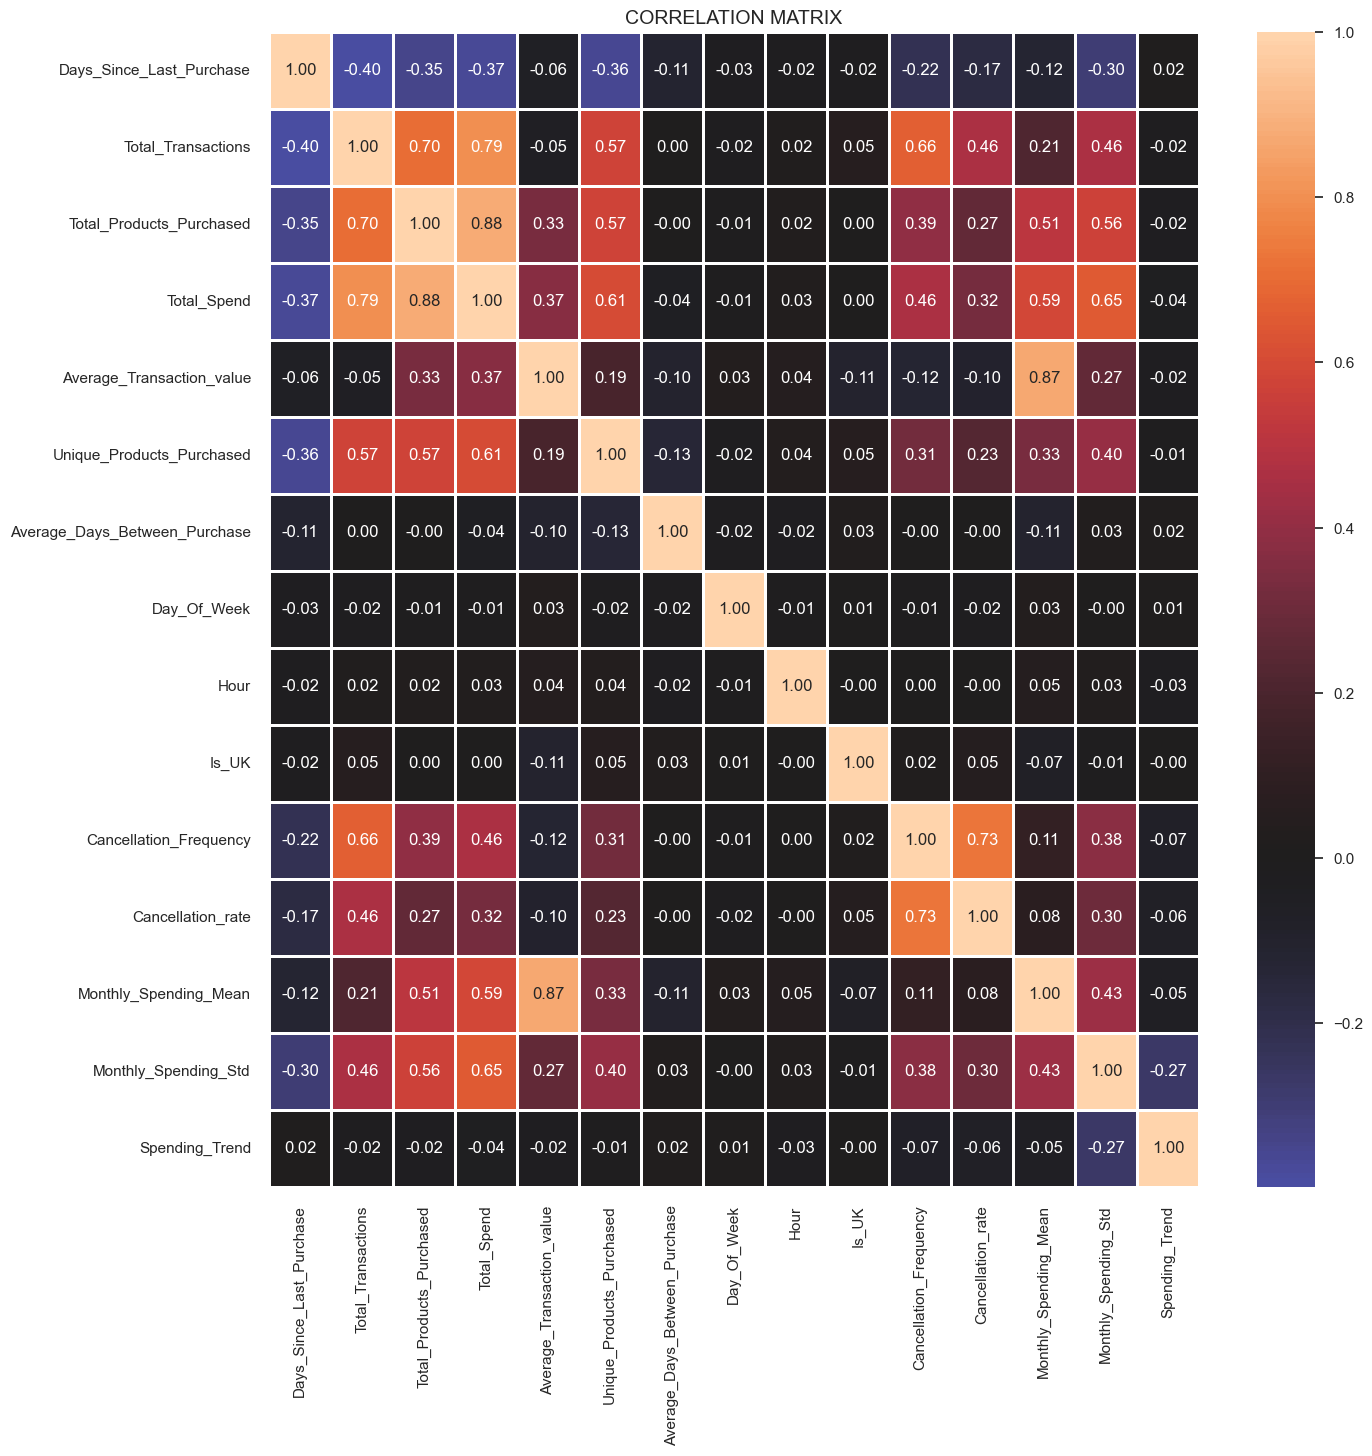

In [136]:
sns.set_style("whitegrid")

corr = customer_data_cleaned.drop(columns=["CustomerID"]).corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, center=0, fmt=".2f", linewidths=2)
plt.title("CORRELATION MATRIX", fontsize=14)
plt.show()

Monthly_Spending_Mean and Average_Transaction_Value

Total_Spend and Total_Products_Purchased

Total_Transactions and Total_Spend

Cancellation_Rate and Cancellation_Frequency

Total_Transactions and Total_Products_Purchased

the above are highly corelated features 

FEATURES DCALING 

Reasons for the Features Scaling 

FOR K-MEANS CLUSTERING: K- Means heavily impact on the concept of distance between data points to form clusters when features are not on similar scale, feature with larger value can dispropotionately influence the clustering outcome, potentially leading to incorrect grouping 

FOR PCA: PCA aims to find the direction where the data varies the most. When features are not scaled those with larger value might dominate these components, not accurately reflecting the underlying patterns in the data. 



METHODLOGY 

We are going to Strandaridize our data, mean = 0 and std = 1. 

not all features required scaling 

CustomerID: This feature just an identifier for the customers

IS_UK : this is binary feature indicating whether customer is uk or not 

Day_Of_Week: this represents the most frequent day of the week of the customer made a transaction. 



In [137]:
scaler = StandardScaler()

columns_to_exclude = ["CustomerID", "Is_UK", "Days_Of_Week"]

columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

customer_data_scaled = customer_data_cleaned.copy()

customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

customer_data_scaled.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.276925,-0.480906,-0.766005,-0.831012,-1.324038,-0.895180,-0.317095,0.895476,1.706692,1,0.404161,0.394341,-1.324130,-0.711158,0.130517
1,12347.0,-1.019661,0.710810,2.039682,2.424866,1.538767,0.793025,-0.131495,-0.212664,-1.226823,0,-0.539423,-0.427525,0.953244,1.217055,0.157006
2,12348.0,0.013269,-0.004219,1.895859,0.254714,0.346598,-0.564159,0.567822,0.895476,-1.645897,0,-0.539423,-0.427525,0.447867,1.064406,-1.553074
3,12350.0,2.024187,-0.719249,-0.542280,-0.608615,0.044794,-0.646914,-0.317095,2.003615,0.449471,0,-0.539423,-0.427525,-0.235218,-0.711158,0.130517
4,12352.0,-0.569128,0.949153,-0.237513,0.124909,-0.588587,0.031678,-0.016466,0.895476,0.449471,0,0.404161,-0.222059,-0.154021,0.274545,0.062499


DIMENSIONALITY REDUCTION 

WHY: 

MULTICOLLINEARITY DETECTED: Dimensionality reduction can helps us remove reductant information and alleviate the multicollinearity issue. 

BETTER CLUSTERING WITH K-MEANS: Since K-Means is distance based algorithm having large number of features can sometimes dilute the meaningful underlying pattern in the data. we dimensionalitu reduction to find more compact and well separated clusters 

NOISE REDUCTION : by focusing most important features, we can potentially remove noise in the data, leading to more accurate and stable cluster 

ENHANCED VISUALIZATION : being able to visualize customer groups in two or three dimension can provide intutive thoughts. Dimensionality reduction techniques can facilitate this by reduction the data to a few principal components which can be plotted easily. 

IMPORVED COMPUTATIONAL EFFICIENCY : Removing the number of features can speed up the computation time during the modelling process, making our clustering algorithm more efficient. 



WHICH DIMENSIONALITY REDUCTION METHOD 

Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP we are chosing PCA 

PCA ----> it works well in capturing linear relationship in the data, which particularly relevant give the multicollinearity we identified in our ddataset. It allow us to reduce the number of features in our dataset while retaing a significant amount of information thus making our clustering analysis potentialy more accurate and interpretable. it is computationally efficient. 

we need to keep our option open. after applying PCA. if we find first few components do not capture a significant amount of variance, indicating a loss of vital information , we might consider a non-linear methods. This methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex pattern that PCA might miss, albeit at the cost of increased computational time and complecity. 



METHODLOGY

we will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal components can explain, thereby helping me to pinpoint the optimal numbrt of components to retain for the analysis. 

In [138]:
customer_data.shape

(4282, 18)

C:\Users\vishw\AppData\Local\Temp\ipykernel_15952\2840996539.py:30: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],


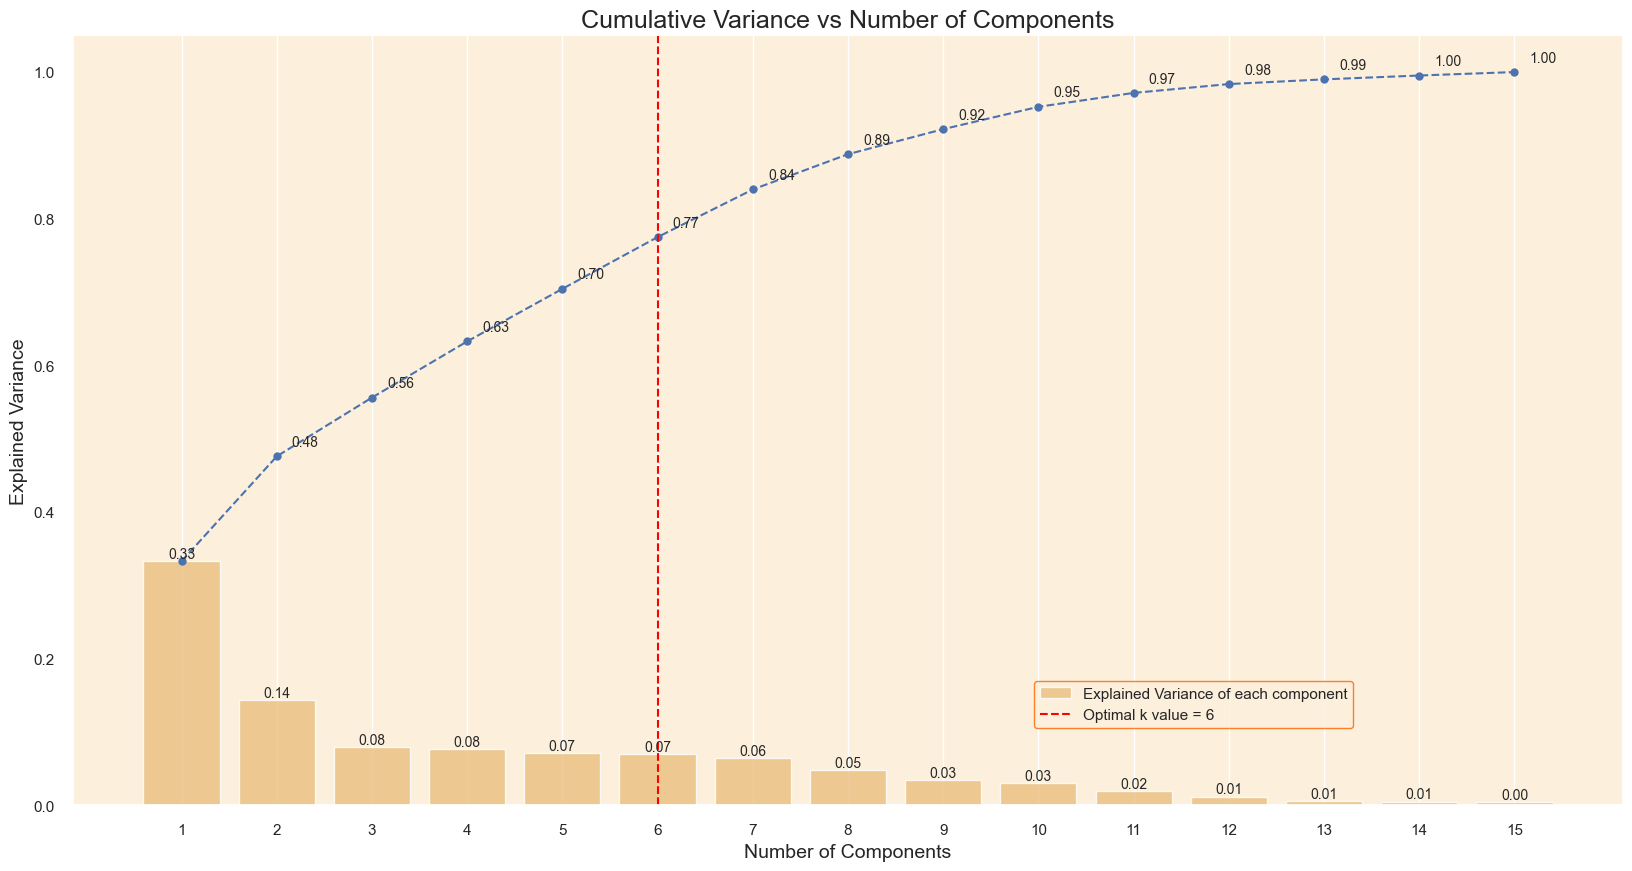

In [139]:
# Setting customer id as index
customer_data_scaled.set_index("CustomerID", inplace=True)

# apply PCA
pca = PCA().fit(customer_data_scaled)

# calculate cumulative sum of the explained variance 
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# based on our analysis we can choose 6 
optimal_k = 6 

sns.set(rc={"axes.facecolor": "#fcf0dc"}, style="darkgrid")

plt.figure(figsize=(20,10))

barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, color="#fcc36d", alpha=0.8)

lineplot = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker="o", linestyle="--", label=f"Optimal K value ={optimal_k}")

optimal_k_line = plt.axvline(optimal_k - 1, color="red", linestyle="--", label=f"Optimal k value={optimal_k}")

plt.xlabel("Number of Components", fontsize=14)
plt.ylabel("Explained Variance", fontsize=14)
plt.title("Cumulative Variance vs Number of Components", fontsize=18)

# Customize ticks and legends 
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels = ["Explained Variance of each component", "Cumulative Explained Variace", f"Optimal k value = {optimal_k}"],
           loc=[0.62, 0.1],
           frameon = 1.0,
           edgecolor="#ff6200")

x_offset = 0.3 
y_offset = 0.01 
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}",ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()


In [140]:
customer_data_scaled.head()

,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_value,Unique_Products_Purchased,Average_Days_Between_Purchase,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
CustomerID,,,,,,,,,,,,,,,
12346.0,2.276925,-0.480906,-0.766005,-0.831012,-1.324038,-0.895180,-0.317095,0.895476,1.706692,1,0.404161,0.394341,-1.324130,-0.711158,0.130517
12347.0,-1.019661,0.710810,2.039682,2.424866,1.538767,0.793025,-0.131495,-0.212664,-1.226823,0,-0.539423,-0.427525,0.953244,1.217055,0.157006
12348.0,0.013269,-0.004219,1.895859,0.254714,0.346598,-0.564159,0.567822,0.895476,-1.645897,0,-0.539423,-0.427525,0.447867,1.064406,-1.553074
12350.0,2.024187,-0.719249,-0.542280,-0.608615,0.044794,-0.646914,-0.317095,2.003615,0.449471,0,-0.539423,-0.427525,-0.235218,-0.711158,0.130517
12352.0,-0.569128,0.949153,-0.237513,0.124909,-0.588587,0.031678,-0.016466,0.895476,0.449471,0,0.404161,-0.222059,-0.154021,0.274545,0.062499


CONCLUSION 

the plot and cumulative explained variance value indicates how much the toatl variance in the dataset is captured by each principal component as well as the cumulative variance explained by the first n components 

OBSERVATION 

the first component explains appox 28% of the variance 

the first two components together explains about 49% of the variance 

and so on 

to choose optimal number of components we generally look for the point where adding another components doesn't significantly increase the cumulative explained variance often referred to as the elbow point in the curve 

from the plot we can see that the increase in cumulative variance starts to slow down after 6th component(which captures 81% of the total variance)

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identifu distinct customer groups effectively. Therefore retaining the first the first 6 components might be balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensioality of the dataset 

In [141]:
pca = PCA(n_components=6)

customer_data_pca = pca.fit_transform(customer_data_scaled)

customer_data_pca = pd.DataFrame(customer_data_pca, columns=["PC"+str(i+1) for i in range(pca.n_components_)])

customer_data_pca.index = customer_data_scaled.index

customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.222762,-1.392608,-1.235881,-1.051329,-0.290612,-1.593761
12347.0,3.253172,1.832543,1.117020,0.355746,0.407302,1.065725
12348.0,0.990314,0.918677,-0.425920,1.545453,1.831121,0.716995
12350.0,-1.953047,0.721526,-0.573532,-0.889862,1.232292,-1.365059
12352.0,0.473858,-0.705740,0.311185,0.096595,0.268180,-1.083705


Now, let's extract the coefficient corresponding to eadch principal components to better understands the transformation performed by PCA 


In [142]:
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ["background-color: #ffeca" if i in top3 else "" for i in column.index ]

pc_df = pd.DataFrame(pca.components_.T, columns=["PC{}". format(i+1) for i in range(pca.n_components_)], index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.219944,0.096468,-0.354488,-0.306966,0.047715,0.173196
Total_Transactions,0.379988,-0.256281,0.123045,-0.067386,-0.047009,-0.022550
Total_Products_Purchased,0.398466,0.074352,0.147734,0.010559,-0.040548,0.029394
Total_Spend,0.430213,0.073080,0.092444,-0.013810,-0.023056,0.024712
Average_Transaction_value,0.169864,0.593413,-0.066831,-0.010857,0.069930,0.073403
Unique_Products_Purchased,0.323753,0.006642,0.158451,-0.139005,-0.138347,-0.056912
Average_Days_Between_Purchase,-0.021059,-0.126713,0.332401,0.722754,0.070681,0.086244
Day_Of_Week,-0.002197,0.050265,0.082443,-0.051160,0.726010,-0.667134
Hour,0.021070,0.048814,-0.152084,0.041151,-0.629086,-0.704919
Is_UK,0.001369,-0.020312,0.007082,0.002406,-0.002183,-0.005408


K-MEANS 

it is an unsupervised ML algo that clusters data into a specified number of groups(k) by minimizing the within cluster sum of squares(WCSS) also know as inertia. The algo iteratively assign each data point to the nearest centroid then updates the centroids by calculating the mean of all assigned points. The process repats untill convergence or a stopping creation is reached. 


DRAWBACKS OF K-MEANS

1. INERTIA IS INFLUENCED BY THE NUMBER OF DIMENSION : The value of inertia trends to increase in high-dimension spaces due to the curse of dimensionality, which can distrot the euclidean distance between data points.

sol : pca 

2. DEPENDENCE ON INITIAL CENTROID PLACEMENT: The K-Means algo might find a local minn instead of global min based on where the centroid are initially placed. 

sol : enhance the likelihood of locating the global min, we can employ      K-Means++ initialization method. 

3. REQUIRES SPECIFIC THE NUMBER OF CLUSTERS: The K-Means requires specifying the number of cluster (k) beforehand, which may not known in advannce 

sol: elbow method and silhouette analysis to estimate the optimal number of clusters. 

4.SENSITIVITY TO UNENVENLY SIZED OR SPARSE CLUSTER: K-means might struggle with cluster of different sizes or densities. 

sol: Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.

5. Assumes convex and isotropic clusters: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.

Solution: Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).

considering this disadvantage - we done pca,, For K-Means algorithm we will set init parameter to k-Means++ and n_init to 10. to determine optimal no.of clusters, then employ elbow and silhoutte analysis. it might be benificial to explore the use of alternative cluster algorithms such as GMM, DBSCAN in future analysis to enhance segementation result. 


DETERMINE THE OPTIMAL NUMBER OF CLUSTERS 

----> Elbow method 

----> Silhouette Method 


The elbow method is a technique for identifying the ideal number of cluster in a dataset. it involves iterating through the data generating clusters for various values of k. the k-means algorithm calculates the sum of squared distance between each data point and it assigned clusters centroid, know as the inertia or WCSS Score. By plotting the inertia score against the k value we create a graph that typically exhibits an elbow shape. that represents the k-value where the reduction in inertia achieved by increasing k become negligible, indicating the optimal stopping point for the number of clusters. 

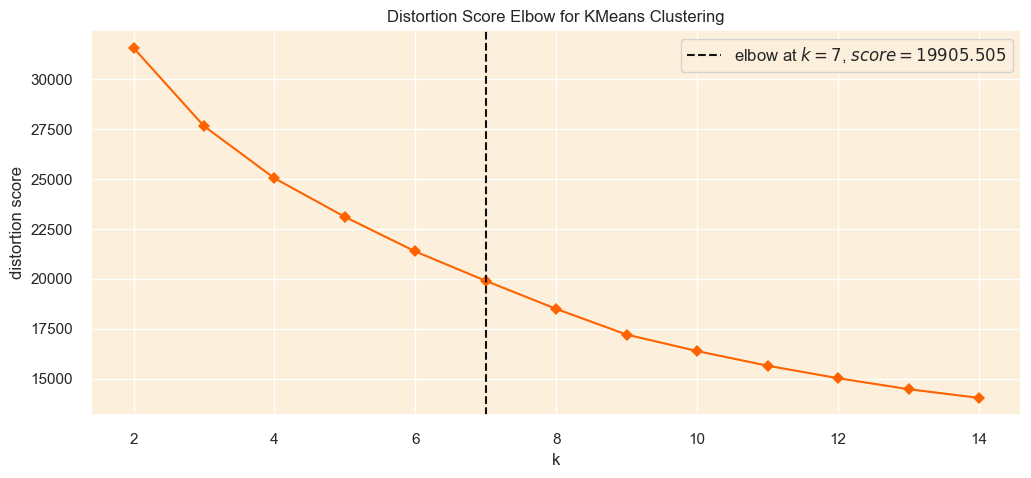

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
sns.set(style="darkgrid", rc={"axes.facecolor": "#fcf0dc"})

sns.set_palette(["#ff6200"])

km = KMeans(init="k-means++", n_init=10, max_iter=100, random_state=0 )

fig, ax = plt.subplots(figsize=(12,5))

visualizer = KElbowVisualizer(km , k=(2,15), timings=False, ax=ax)

visualizer.fit(customer_data_pca)

visualizer.show()

from the above plot we know optimal k value truned out to be 7, howevere we don't have a distinct elbow point in this case. common in real world. here inertia decrease at 7 significantly, optimum value of k could be between 3 to 7. to choose best k within this range we go for silhouette analysis.  

SILHOUETTE METHOD 

by evaluating consistency within cluster and their separation from other cluster. it computes the silhouette coefficient for each data point. which measure how similar a point is to its own cluster compared to other cluster.
It computes the silhouette for each data point which meansure how similar a point is to its own cluster compared to other cluster. 

WHAT IS SILHOUETTE COEFFICIENT 

to determine silhouette coeff 

CALCULATE A: calculate the average distance between point i and all other points within cluster. 

CALCULATE B: Compute the average distance between point i annd all points in the nearest cluster to its own. 

COMPUTE THE SILHOUETTE COEFFICIENT : formula 
 s(i) =( b(i) - a(i)) / max(b(i), a(i))

 the value ranges from -1 to 1 higher value signifies that the point is well alligned with its cluster. 


What is the Silhouette Score?
The silhouette score is the average silhouette coefficient calculated for all data points in a dataset. It provides an overall assessment of the clustering quality, taking into account both cohesion within clusters and separation between clusters. A higher silhouette score indicates a better clustering configuration.

What are the Advantages of Silhouette Method over the Elbow Method?
The Silhouette Method evaluates cluster quality by considering both the cohesion within clusters and their separation from other clusters. This provides a more comprehensive measure of clustering performance compared to the Elbow Method, which only considers the inertia (sum of squared distances within clusters).

he Silhouette Method produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of k. In contrast, the Elbow Method relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbow.

The Silhouette Method generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the Elbow Method, which relies on visual inspection of the inertia plot.


METHODLOGY

I will initially choose a range of 2-6 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot Silhouette scores for each k value to determine the one with the highest score.

Subsequently, to fine-tune the selection of the most appropriate k, I will generate Silhouette plots that visually display the silhouette coefficients for each data point within various clusters.